# Efficiency Factor からSIOPを求めるスクリプト

In [12]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
#def Qsca(x,y,m):
#    def integrate_scattering(theta):
#        return (cal_abs(theta,x,y,m)[0] + cal_abs(theta,x,y,m)[0]) * np.sin(np.radians(theta)) #thetaのいち変数とするための関数。
#
#    integrated,err = integrate.quad(integrate_scattering,0,np.pi) #sympyの数値積分メソッドを使用。同時に推定誤差も返される。
#    return integrated/(x**2)import 

In [13]:
from EfficiencyFactor import Functions
func = Functions()
#test
print(func.pi_n(3,30))

4.125000000000001


In [14]:
def PSD(D,j,K=1):
    """
    particle size distribution(PSD) N(D) = K*D^-j
    D: diameter of the particle
    j: parameter1
    K(optional): parameter2
    """
    return K * D ** (-j)

In [15]:
#derive Qbb
def Qbb(D,Lambda,m):
    x = 2 * np.pi * D / Lambda
    y = m * x
    Q_backscattering = func.Qbsca(x,y,m)
    return Q_backscattering


In [16]:
#test
Qbb(1e-6,4e-7,1.025-1.001j)

1.59690908384976

In [17]:
def Cbb(Lambda,m,j,dmin,dmax):
    def numerator(D):
        Q_bb = Qbb(D,Lambda,m)
        ND = PSD(D,j)
        return Q_bb * np.pi * D**2 * ND /4
    
    def denominator(D):
        ND = PSD(D,j)
        return ND
    
    integrated_numerator,err_numerator = integrate.quad(numerator,dmin,dmax)
    intergrated_denominator,err_denominator = integrate.quad(denominator,dmin,dmax)
    return integrated_numerator/intergrated_denominator
        


In [18]:
def G(j,dmin,dmax):
    def numerator(D):
        ND = PSD(D,j)
        return ND * (D **2)
    
    def denominator(D):
        ND = PSD(D,j)
        return ND
    
    integrated_numerator,err_numerator = integrate.quad(numerator,dmin,dmax)
    intergrated_denominator,err_denominator = integrate.quad(denominator,dmin,dmax)
    return integrated_numerator/intergrated_denominator
    

In [19]:
def bbp_SIOP(Lambda,j,m,pho,dmin,dmax):
    Qbb_ave = Cbb(Lambda,m,j,dmin,dmax)/G(j,dmin,dmax)

    def numerator(D):
        ND = PSD(D,j)
        return ND * (D **2)
    
    def denominator(D):
        ND = PSD(D,j)
        return ND * (D **3)
    
    integrated_numerator,err_numerator = integrate.quad(numerator,dmin,dmax)
    intergrated_denominator,err_denominator = integrate.quad(denominator,dmin,dmax) 

    return 3 * Qbb_ave * integrated_numerator / (2 * pho * intergrated_denominator)  
    

### plot

allowing us to calculate a relative number of particles for each size class
between 0.27 μm and 240 μm (i.e., Dmin and Dmax, respectively), \
Despite the differences in the mineralogy observed for the Madeira River between the rising
water stage and the high water stage, the real part (n) of the refraction index varied within a
very limited range, from 1.167 to 1.183
n' (λ) = 0.015λ^-0.004

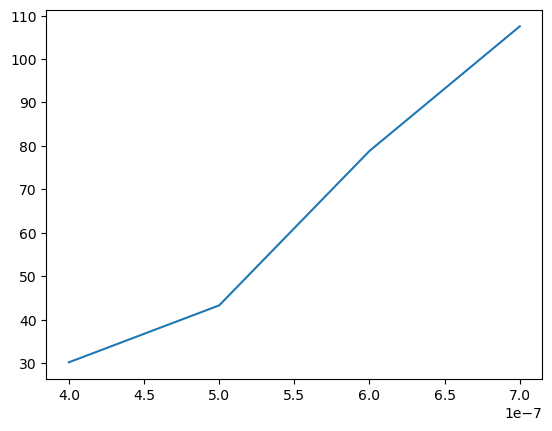

In [20]:
dmin = 0.27 * (1e-6)
dmax = 240 * (1e-6)
j = -4 # -4 is a case for open ocean
pho = 2.5
lambda_min = 4 #* (1e-9)
lambda_max = 8 #* (1e-9)
m = [complex(1.17, 0.015*((l*1e-7) ** -0.004))  for l in range(lambda_min,lambda_max)]
Lambda = [l*(1e-7) for l  in range(lambda_min,lambda_max)]

SIOP = [bbp_SIOP(l,j,m,pho,dmin,dmax) for l,m in zip(Lambda,m)]


fig,ax = plt.subplots()
ax.plot(Lambda,SIOP)
plt.show()